In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
train_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
nan_df = train_data.isnull().sum().reset_index()
nan_df.columns = ['column_name', 'nan_count']
nan_df = nan_df[nan_df.nan_count > 260]
nan_df

,column_name,nan_count
6,Alley,1369
25,MasVnrType,872
57,FireplaceQu,690
72,PoolQC,1453
73,Fence,1179
74,MiscFeature,1406


In [5]:
col_to_drop = nan_df.column_name.tolist()
col_to_drop

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [6]:
train_data = train_data.drop(col_to_drop, axis = 1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
train_data = train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuilt    

In [8]:
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        print(i)
        print(train_data[i].value_counts())
        print('\n')

MSZoning
MSZoning
RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: count, dtype: int64


Street
Street
Pave    1090
Grvl       4
Name: count, dtype: int64


LotShape
LotShape
Reg    760
IR1    301
IR2     26
IR3      7
Name: count, dtype: int64


LandContour
LandContour
Lvl    991
Bnk     45
HLS     44
Low     14
Name: count, dtype: int64


Utilities
Utilities
AllPub    1094
Name: count, dtype: int64


LotConfig
LotConfig
Inside     830
Corner     187
CulDSac     44
FR2         29
FR3          4
Name: count, dtype: int64


LandSlope
LandSlope
Gtl    1045
Mod      44
Sev       5
Name: count, dtype: int64


Neighborhood
Neighborhood
NAmes      173
CollgCr    122
OldTown     96
Somerst     75
NridgHt     74
Edwards     65
Gilbert     49
NWAmes      45
Sawyer      44
SawyerW     44
BrkSide     42
Crawfor     41
NoRidge     33
Mitchel     30
Timber      29
IDOTRR      27
StoneBr     20
SWISU       19
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV     10

In [9]:
train_data = train_data.drop('Id', axis = 1)

In [10]:
train_data.select_dtypes(np.number).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

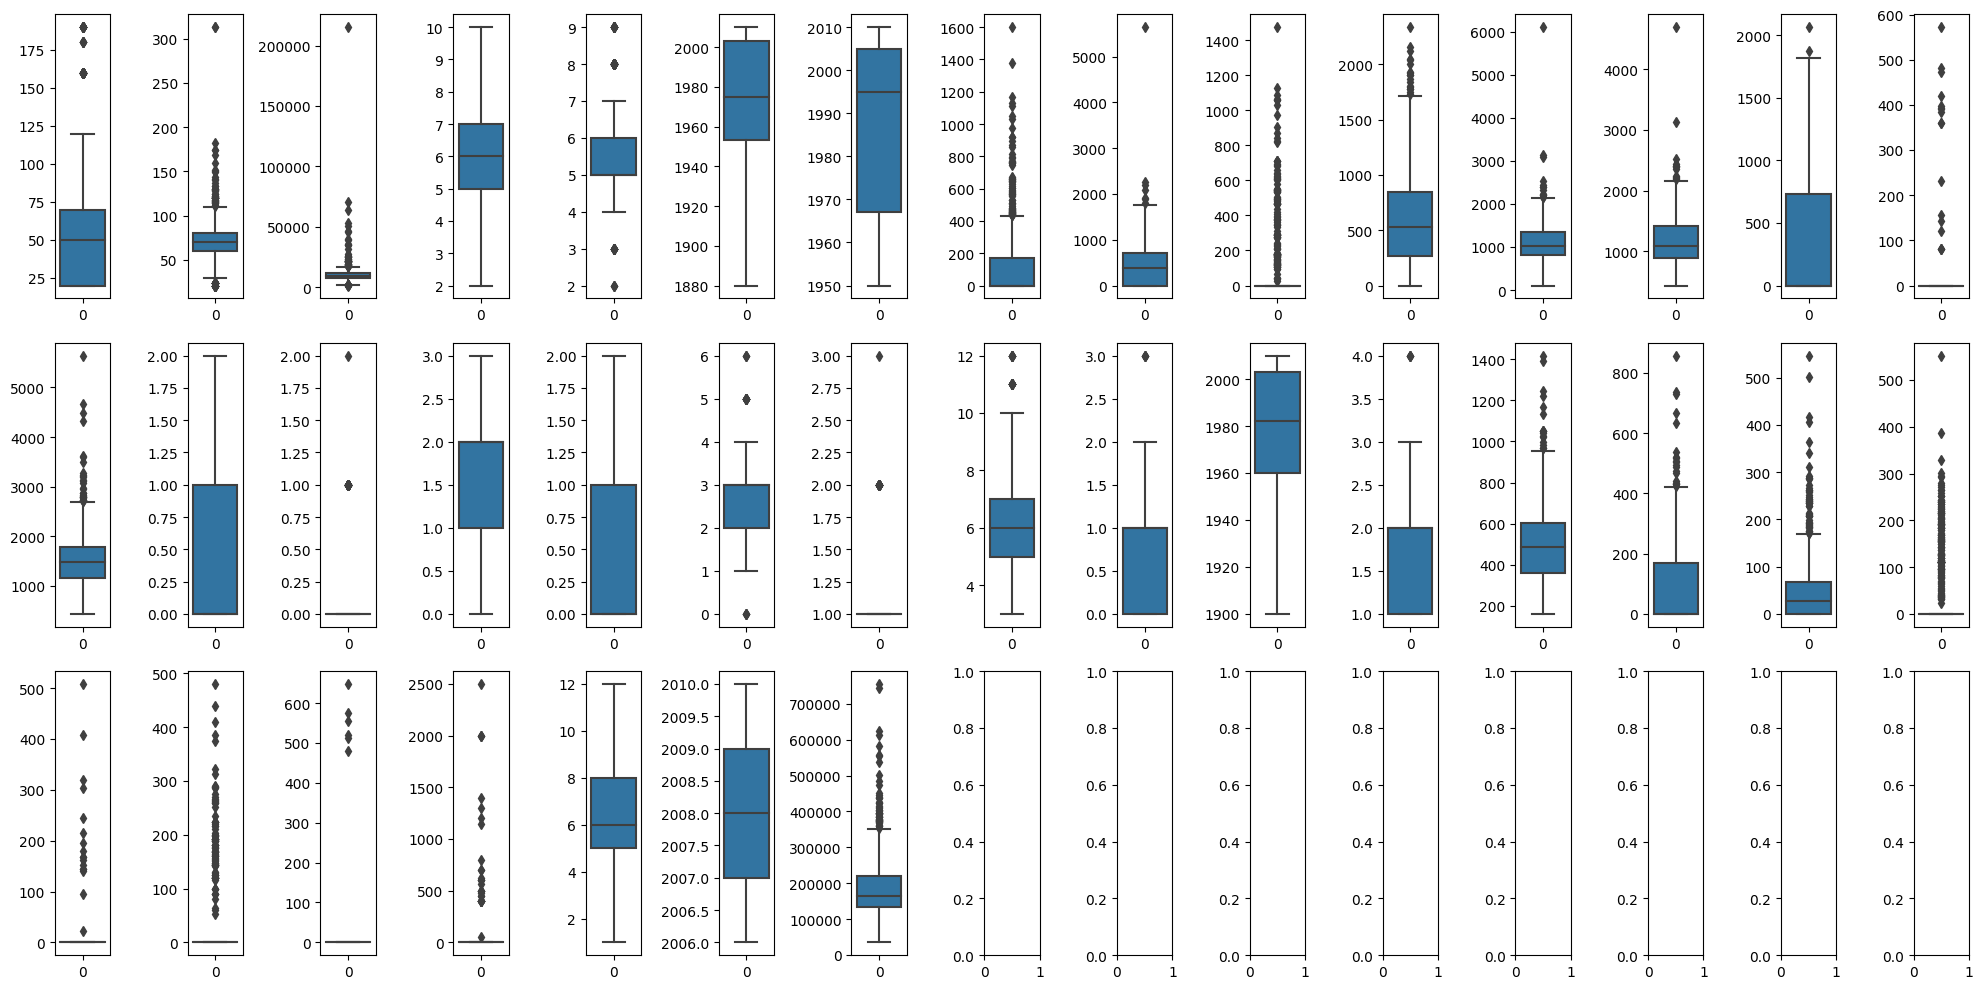

In [11]:
fig, ax = plt.subplots(3,15, figsize = (20,10))
for i, ax in enumerate(ax.flat):
    if i < 37:
        sns.boxplot(train_data.select_dtypes(np.number).iloc[:,i], ax = ax)
plt.tight_layout()
plt.show()

In [12]:
features = train_data.drop('SalePrice', axis = 1)
target = train_data['SalePrice']

In [13]:
encoder = LabelEncoder()

for i in features.columns:
    if features[i].dtype == 'object':
        features[i] = encoder.fit_transform(features[i])

features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 47)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(765, 73) (329, 73) (765,) (329,)


In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')

Mean Squared Error: 2339265045.05
Root Mean Squared Error: 48365.95


In [16]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv = 5) 

grid_search.fit(X_train, y_train)  
y_pred_rf = grid_search.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(mse_rf):.2f}')

Mean Squared Error: 1440511157.07
Root Mean Squared Error: 37954.07


In [17]:
param_grid = {'n_estimators': [100, 150, 200, 300],
                'learning_rate': [0.01, 0.1, 0.5, 1],
                'max_depth': [3, 5, 7, 9]}
gb = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(gb, param_grid, cv = 5)
grid_search_gb.fit(X_train, y_train)

y_pred_gb = grid_search_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f'Mean Squared Error: {mse_gb:.2f}')
print(f'Root Mean Squared Error: {np.sqrt(mse_gb):.2f}')


Mean Squared Error: 1168256996.42
Root Mean Squared Error: 34179.77


In [18]:
best_gb = grid_search_gb.best_estimator_
best_gb

GradientBoostingRegressor(n_estimators=300)

In [19]:
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
test_df.drop(col_to_drop, axis = 1, inplace=True)

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [22]:
for i in test_df.select_dtypes(np.number).columns.to_list():
    test_df[i] = test_df[i].fillna(test_df[i].mean())

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [23]:
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [24]:
test_df.isnull().sum().sum()

0

In [25]:
test_data = test_df.drop('Id', axis = 1)

for i in test_data.columns:
    if test_data[i].dtype == 'object':
        test_data[i] = encoder.fit_transform(test_data[i])

test_data 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


In [26]:
scaled_test_data = scaler.transform(test_data)
scaled_test_data

array([[-0.8817993 , -1.56583043,  0.38887974, ...,  1.67386036,
         0.33305771,  0.17326601],
       [-0.8817993 , -0.06286898,  0.42967692, ...,  1.67386036,
         0.33305771,  0.17326601],
       [ 0.04720943, -0.06286898,  0.14409669, ...,  1.67386036,
         0.33305771,  0.17326601],
       ...,
       [-0.8817993 , -0.06286898,  3.65265376, ..., -1.36050736,
         0.33305771, -3.50863661],
       [ 0.62783989, -0.06286898, -0.34546941, ..., -1.36050736,
         0.33305771,  0.17326601],
       [ 0.04720943, -0.06286898,  0.14409669, ..., -1.36050736,
         0.33305771,  0.17326601]])

In [27]:
scaled_features = scaler.transform(features)

best_gb.fit(scaled_features, target)
predictions = best_gb.predict(scaled_test_data)

submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})
submission.head()

,Id,SalePrice
0,1461,123479.922034
1,1462,160514.813731
2,1463,194678.401367
3,1464,186620.915576
4,1465,192810.521473


In [28]:
submission.to_csv('submission.csv', index = False)